In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
car_data = pd.read_csv('car data.csv')
car_data.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
290,amaze,2014,4.50,6.400,19000,Petrol,Dealer,Manual,0
137,Hero Extreme,2013,0.65,0.787,16000,Petrol,Individual,Manual,0
234,grand i10,2015,5.50,5.700,4492,Petrol,Dealer,Manual,0
53,fortuner,2013,16.00,30.610,135000,Diesel,Individual,Automatic,0
294,amaze,2014,3.75,6.800,33019,Petrol,Dealer,Manual,0
39,sx4,2003,2.25,7.980,62000,Petrol,Dealer,Manual,0
278,jazz,2016,6.00,8.400,4000,Petrol,Dealer,Manual,0
81,etios gd,2015,4.75,7.850,40000,Diesel,Dealer,Manual,0
256,city,2016,10.25,13.600,49562,Petrol,Dealer,Manual,0
192,Hero Hunk,2007,0.20,0.750,49000,Petrol,Individual,Manual,1


In [7]:
print("Missing Value: ")
car_data.isna().sum()

Missing Value: 


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# Feature Engineering
current_year = 2026
car_data['Car_Age'] = current_year - car_data['Year']
car_data['Km_Driven_per_Year'] = car_data['Driven_kms'] / (car_data['Car_Age'] + 1)

In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age,Km_Driven_per_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,12,2076.923077
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13,3071.428571
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,9,690.000000
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,15,325.000000
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,12,3265.384615


<Figure size 1200x800 with 0 Axes>

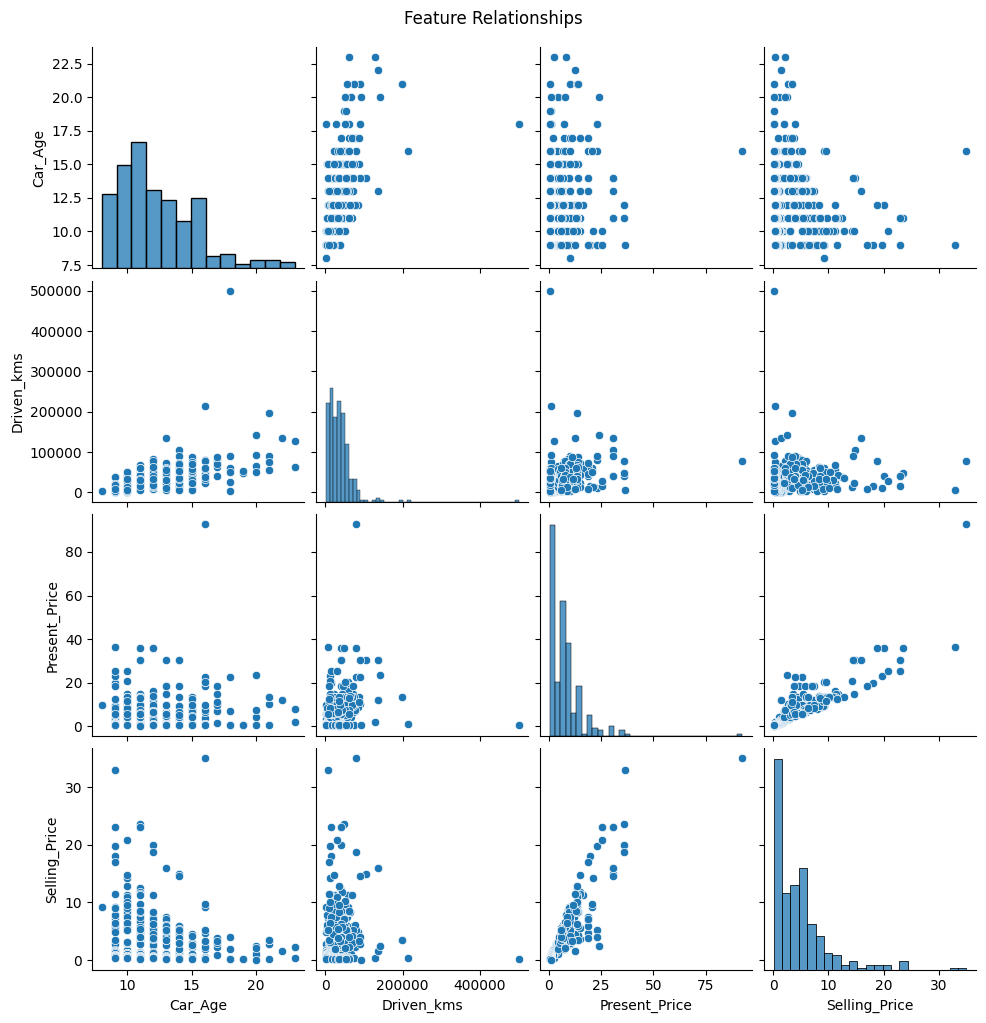

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(car_data[['Car_Age', 'Driven_kms', 'Present_Price', 'Selling_Price']])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

In [12]:
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Km_Driven_per_Year']

In [13]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [16]:
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train_processed, y_train)

predictions = model.predict(X_test_processed)

print("\nModel Performance:")
print(f"MAE: {mean_absolute_error(y_test, predictions):.2f} lakhs")
print(f"R² Score: {r2_score(y_test, predictions):.2f}")


Model Performance:
MAE: 0.64 lakhs
R² Score: 0.96


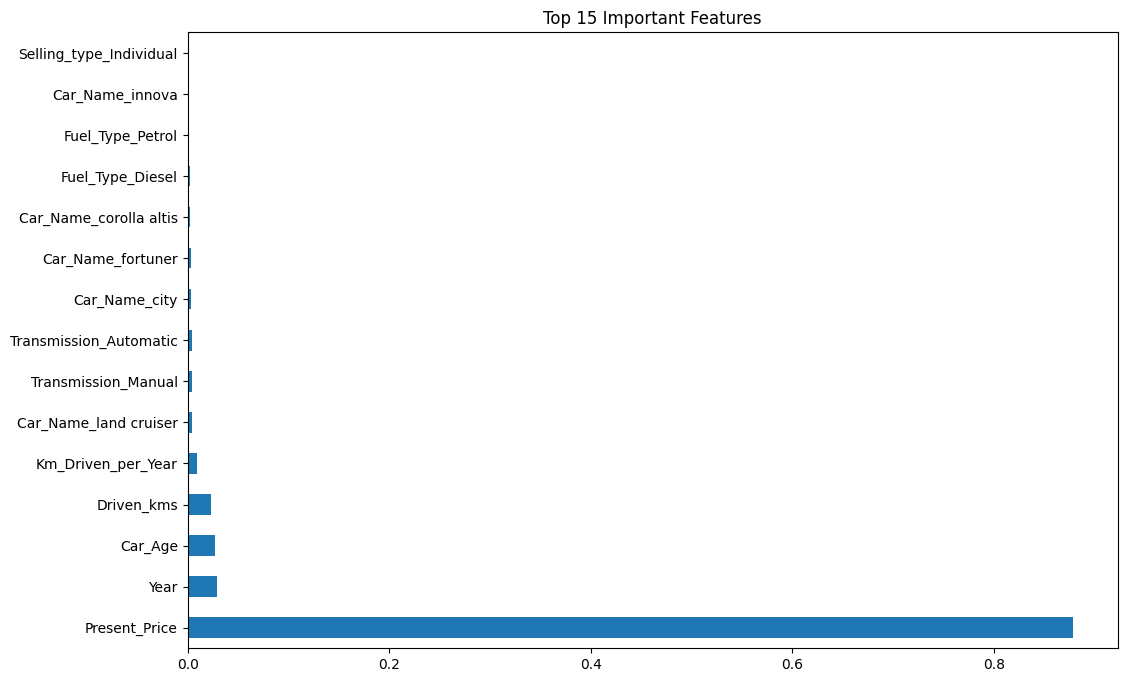

In [17]:
# Feature importance
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

importances = pd.Series(model.feature_importances_, index=feature_names)
plt.figure(figsize=(12, 8))
importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Important Features')
plt.show()

In [18]:
# Prediction function
def predict_car_price(car_data):
    car_df = pd.DataFrame([car_data])
    car_df['Car_Age'] = current_year - car_df['Year']
    car_df['Km_Driven_per_Year'] = car_df['Driven_kms'] / (car_df['Car_Age'] + 1)
    processed_data = preprocessor.transform(car_df)
    return model.predict(processed_data)[0]

In [19]:
sample_car = {
    'Car_Name': 'swift',
    'Year': 2018,
    'Present_Price': 7.5,
    'Driven_kms': 35000,
    'Fuel_Type': 'Petrol',
    'Selling_type': 'Dealer',
    'Transmission': 'Manual',
    'Owner': 0
}

predicted_price = predict_car_price(sample_car)
print(f"\nPredicted Selling Price: {predicted_price:.2f} lakhs")


Predicted Selling Price: 5.43 lakhs
